Extracting EDF parameters from D:\Parthasarathy paper\dataset\AJUGEORGE.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...


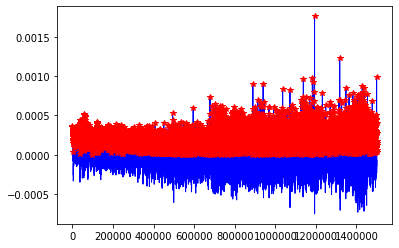

BPM avg:  67.49184
Time:  1.6276041666666667 
Length:  1500000


In [11]:
import mne
import numpy as np
import pandas as pd
from os import listdir
from os.path import isfile, join
from scipy.signal import butter, freqs, filtfilt
import matplotlib.pyplot as plt
from scipy.signal import find_peaks


def find_time(sig):
    time = ((sig/256)/60)/60
    print("Time: ", time , "\nLength: ",sig)
    return ((sig/256)/60)/60


def channel_id(channel, val):   
    j =0
    for i in channel:
        if(i == val):
            return j
        
        j+=1
        
file = "dataset/AJUGEORGE.edf"
data = mne.io.read_raw_edf(file)
raw_data = data.get_data()
# you can get the metadata included in the file and a list of all channels:
info = data.info
channels = data.ch_names

ecgl = raw_data[27]
ecgr = raw_data[28]
sig = ecgl[:1500000] - ecgr[:1500000]
del data
del ecgl
del ecgr

fs = 256
n = len(sig)
fc = 4
duration_sec = n / fs
duration_min = duration_sec / 60

b, a = butter(6, fc/(fs/2), 'low', analog=False)
y = filtfilt(b, a, sig[:])
peaks, _ = find_peaks(y, distance = 150, height=0)

#plotting
plt.plot(y, 'b-', linewidth=1)
plt.plot(peaks, y[peaks], "*", color="red")
fig1 = plt.gcf()
plt.show()
# loc = filename.split(".")[0] +".png"
# fig1.savefig("pics/"+loc, dpi= 1000)



#beat avg
beat_count = len(peaks)
fs = 256
n = len(sig)
duration_sec = n/fs
duration_min = duration_sec/60
bpm_avg = beat_count/duration_min
print("BPM avg: ",bpm_avg)


inter_peak_interval = []
for i in range(0, len(y[peaks])-1):
    inter_peak_interval.append(y[peaks][i+1] - y[peaks][i])
ipi_mean = np.array(inter_peak_interval).mean()


#peaks 
peak_time = []
for i in range(0, len(peaks)):
    peak_time.append(peaks[i]/256)
pt_mean = np.array(peak_time).mean()



# inter peak time
inter_peak_time = []
rmsd = 0
for i in range(0, len(y[peaks])-1):
    inter_peak_time.append(((peaks[i+1] - peaks[i])))
rr_sqdiff = np.power(inter_peak_time, 2)
rmsd = np.sqrt(np.mean(rr_sqdiff))


ipt_mean = np.array(inter_peak_time).mean()
ipt_sdsd = np.array(inter_peak_time).std()
ipt_sdnn = np.array(peak_time).std()/60
ipt_max = np.array(inter_peak_time).max()
ipt_min = np.array(inter_peak_time).min()


data = [[file,find_time(len(sig)),bpm_avg,rmsd,ipt_sdsd,ipt_sdnn, ipt_mean/256,ipt_max/256,ipt_min/256
         ,pt_mean/60]]
df1 = pd.DataFrame(data,columns=['File Name','Duration','BPM','RMSD','SDSD','SDNN','Inter Peak Interval Avg','Inter Peak Time Interval Max','Inter Peak Time Interval Min','Peak Time Avg'])

del sig


Extracting EDF parameters from D:\Parthasarathy paper\dataset\AJUGEORGE.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...


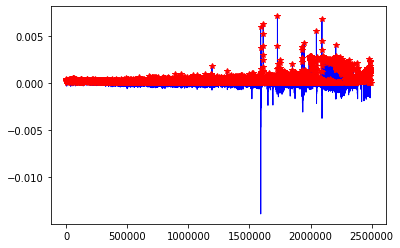

BPM avg:  61.27620221948212
Time:  2.703333333333333 
Length:  2491392


In [8]:
import mne
import numpy as np
import pandas as pd
from os import listdir
from os.path import isfile, join
from scipy.signal import butter, freqs, filtfilt
import matplotlib.pyplot as plt
from scipy.signal import find_peaks


def find_time(sig):
    time = ((sig/256)/60)/60
    print("Time: ", time , "\nLength: ",sig)
    return ((sig/256)/60)/60


def channel_id(channel, val):   
    j =0
    for i in channel:
        if(i == val):
            return j
        
        j+=1
        
file = "dataset/AJUGEORGE.edf"
data = mne.io.read_raw_edf(file)
raw_data = data.get_data()
# you can get the metadata included in the file and a list of all channels:
info = data.info
channels = data.ch_names

ecgl = raw_data[27]
ecgr = raw_data[28]
sig = ecgl[:] - ecgr[:]
del data
del ecgl
del ecgr

fs = 256
n = len(sig)
fc = 4
duration_sec = n / fs
duration_min = duration_sec / 60

b, a = butter(6, fc/(fs/2), 'low', analog=False)
y = filtfilt(b, a, sig[:])
peaks, _ = find_peaks(y, distance = 150, height=0)

#plotting
plt.plot(y, 'b-', linewidth=1)
plt.plot(peaks, y[peaks], "*", color="red")
fig1 = plt.gcf()
plt.show()
# loc = filename.split(".")[0] +".png"
# fig1.savefig("pics/"+loc, dpi= 1000)



#beat avg
beat_count = len(peaks)
fs = 256
n = len(sig)
duration_sec = n/fs
duration_min = duration_sec/60
bpm_avg = beat_count/duration_min
print("BPM avg: ",bpm_avg)


inter_peak_interval = []
for i in range(0, len(y[peaks])-1):
    inter_peak_interval.append(y[peaks][i+1] - y[peaks][i])
ipi_mean = np.array(inter_peak_interval).mean()


#peaks 
peak_time = []
for i in range(0, len(peaks)):
    peak_time.append(peaks[i]/256)
pt_mean = np.array(peak_time).mean()



# inter peak time
inter_peak_time = []
rmsd = 0
for i in range(0, len(y[peaks])-1):
    inter_peak_time.append(((peaks[i+1] - peaks[i])))
rr_sqdiff = np.power(inter_peak_time, 2)
rmsd = np.sqrt(np.mean(rr_sqdiff))


ipt_mean = np.array(inter_peak_time).mean()
ipt_sdsd = np.array(inter_peak_time).std()
ipt_sdnn = np.array(peak_time).std()/60
ipt_max = np.array(inter_peak_time).max()
ipt_min = np.array(inter_peak_time).min()


data = [[file,find_time(len(sig)),bpm_avg,rmsd,ipt_sdsd,ipt_sdnn, ipt_mean/256,ipt_max/256,ipt_min/256
         ,pt_mean/60]]
df1 = pd.DataFrame(data,columns=['File Name','Duration','BPM','RMSD','SDSD','SDNN','Inter Peak Interval Avg','Inter Peak Time Interval Max','Inter Peak Time Interval Min','Peak Time Avg'])

del sig


In [7]:
df1 #1000000

,File Name,Duration,BPM,RMSD,SDSD,SDNN,Inter Peak Interval Avg,Inter Peak Time Interval Max,Inter Peak Time Interval Min,Peak Time Avg
0,dataset/AJUGEORGE.edf,1.085069,68.5056,241.224278,89.036027,18.881125,0.875747,5.5625,0.585938,30.753715


In [10]:
df1

,File Name,Duration,BPM,RMSD,SDSD,SDNN,Inter Peak Interval Avg,Inter Peak Time Interval Max,Inter Peak Time Interval Min,Peak Time Avg
0,dataset/AJUGEORGE.edf,2.703333,61.276202,285.088271,135.789308,46.21279,0.979189,9.050781,0.585938,74.293695


In [13]:
import pickle
import os

filename = 'Ajay'

def saveConfig():
  
    if not os.path.exists('config'):
        os.makedirs('config')

    file = open('config/'+filename +'.pckl', 'w+')
    file.close()
    
    start = 5000
    end = 10000
    obj = [start,end]
    f = open('config/'+filename +'.pckl', 'wb')
    pickle.dump(obj, f)
    f.close()
    print('Saved..' + filename)
    
    
def loadConfig():
    f = open('config/'+filename +'.pckl', 'rb')
    obj = pickle.load(f)
    print(obj[0])
    print(obj[1])
    f.close()
    print('Loaded..' + filename)

In [14]:
saveConfig()
loadConfig()

Saved..Ajay
5000
10000
Loaded..Ajay
